##### Table:
1. [***Data Wrangling***](#wrangling)    
    1.1. [__Data Gathering__](#gathering), data from this project, should be collected from 3 different sources:    
    1.1.1.[The WeRateDogs Twitter archive](#enhanced) This file was located on project page on class, and download manually: `tweeter-archive-enhanced.csv`    
    1.1.2. [The tweet image predictions](#image) This file is a prediction of dog breed for each tweet according based on neural network. This file `image_predictions.tsv`, was hosted on Udacity's servers and downloaded programmatically using the `Requests` library from the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv   
    1.1.3. [Scrapping tweeter account](#scrap) There are some missing complementary data from "WeRateDogs" account which help for better analysis result.     
    1.2. [__Data Assessing__](#assess) Finding quality and tidy issues with downloaded data sets   
    1.3. [__Data Cleaning__](#clean) Define, code and test, data sets to be ready for analysis. The final result is a clean dataframe named: `twitter_archive_master.csv`
2. [***Data Analyzing and Visualization***](#analysis), digging inside data to find some tips from total data frame and visual them

<a id='wrangling'></a>
## 1. Data Wrangling

In [3]:
import pandas as pd
import numpy as np

In [2]:
import requests
import os

<a id='gathering'></a>
### 1.1. Data Gathering

<a id='gathering'></a>
#### 1.1.1. The WeRateDogs Twitter archive

In [2]:
twitter_ae = pd.read_csv('twitter-archive-enhanced.csv')
twitter_ae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='image'></a>
#### 1.1.2. The Tweet Image Prediction

In [2]:
# download image_predictions.tsv file and save it in current directory
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='scrap'></a>
#### 1.1.3. Scrapping tweeter Acount

In [5]:
import tweepy
import config
from tweepy import OAuthHandler
import json
from timeit import defaulat_timer as timer

# I saved all needed authentication for tweeter in file named: config.py and config.py refer to that file 
auth = tweepy.OAuthHandler(config.API_key, config.API_secret)
auth.set_access_token(config.Access_token, config.Access_secret)

api = tweepy.API(auth)

In [6]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_ae.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
print(len(fails_dict))

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804

Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079:

Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353:

Fail
1594: 686386521809772549
Fail
1595: 686377065986265092
Fail
1596: 686358356425093120
Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Fail
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
1617: 685198997565345792
Fail
1618: 685169283572338688
Fail
1619: 684969860808454144
Fail
1620: 684959798585110529
Fail
1621: 684940049151070208
Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626: 684830982659280897
Fail
1627:

Fail
1868: 675334060156301312
Fail
1869: 675166823650848770
Fail
1870: 675153376133427200
Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Fail
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
Fail
1889: 674781762103414784
Fail
1890: 674774481756377088
Fail
1891: 674767892831932416
Fail
1892: 674764817387900928
Fail
1893: 674754018082705410
Fail
1894: 674752233200820224
Fail
1895: 674743008475090944
Fail
1896: 674742531037511680
Fail
1897: 674739953134403584
Fail
1898: 674737130913071104
Fail
1899: 674690135443775488
Fail
1900: 674670581682434048
Fail
1901:

Fail
2142: 669993076832759809
Fail
2143: 669972011175813120
Fail
2144: 669970042633789440
Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164: 669375718304980992
Fail
2165: 669371483794317312
Fail
2166: 669367896104181761
Fail
2167: 669363888236994561
Fail
2168: 669359674819481600
Fail
2169: 669354382627049472
Fail
2170: 669353438988365824
Fail
2171: 669351434509529089
Fail
2172: 669328503091937280
Fail
2173: 669327207240699904
Fail
2174: 669324657376567296
Fail
2175:

In [8]:
outfile.close()

In [9]:
# trying again for downloading twitter IDs which failed with error 88:  'Rate limit exceeded',
# the length of tweet IDs error dictionary in first try is 1468
try2_twitt_id = fails_dict.keys()
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict2 = {}
start = timer()
# Save each tweet's returned JSON as a new line in a tweet_json.txt file
with open('tweet_json.txt', 'a+') as outfile:
    for tweet_id in try2_twitt_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict2[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict2)
print(len(fails_dict2))

1: 888202515573088257
Fail
2: 873697596434513921
Fail
3: 872668790621863937
Fail
4: 869988702071779329
Fail
5: 866816280283807744
Fail
6: 861769973181624320
Fail
7: 845459076796616705
Fail
8: 842892208864923648
Fail
9: 837012587749474308
Fail
10: 827228250799742977
Fail
11: 802247111496568832
Fail
12: 775096608509886464
Fail
13: 770743923962707968
Fail
14: 758740312047005698
Success
15: 758474966123810816
Success
16: 758467244762497024
Success
17: 758405701903519748
Success
18: 758355060040593408
Success
19: 758099635764359168
Success
20: 758041019896193024
Success
21: 757741869644341248
Success
22: 757729163776290825
Success
23: 757725642876129280
Success
24: 757611664640446465
Success
25: 757597904299253760
Success
26: 757596066325864448
Success
27: 757400162377592832
Success
28: 757393109802180609
Success
29: 757354760399941633
Success
30: 756998049151549440
Success
31: 756939218950160384
Success
32: 756651752796094464
Success
33: 756526248105566208
Success
34: 756303284449767430
Su

Success
262: 726887082820554753
Success
263: 726828223124897792
Success
264: 726224900189511680
Success
265: 725842289046749185
Success
266: 725786712245440512
Success
267: 725729321944506368
Success
268: 725458796924002305
Success
269: 724983749226668032
Success
270: 724771698126512129
Success
271: 724405726123311104
Success
272: 724049859469295616
Success
273: 724046343203856385
Success
274: 724004602748780546
Success
275: 723912936180330496
Success
276: 723688335806480385
Success
277: 723673163800948736
Success
278: 723179728551723008
Success
279: 722974582966214656
Success
280: 722613351520608256
Success
281: 721503162398597120
Success
282: 721001180231503872
Success
283: 720785406564900865
Success
284: 720775346191278080
Success
285: 720415127506415616
Success
286: 720389942216527872
Success
287: 720340705894408192
Success
288: 720059472081784833
Success
289: 720043174954147842
Success
290: 719991154352222208
Success
291: 719704490224398336
Success
292: 719551379208073216
Success


Success
519: 699323444782047232
Success
520: 699088579889332224
Success
521: 699079609774645248
Success
522: 699072405256409088
Success
523: 699060279947165696
Success
524: 699036661657767936
Success
525: 698989035503689728
Success
526: 698953797952008193
Success
527: 698907974262222848
Success
528: 698710712454139905
Success
529: 698703483621523456
Success
530: 698635131305795584
Success
531: 698549713696649216
Success
532: 698355670425473025
Success
533: 698342080612007937
Success
534: 698262614669991936
Success
535: 698195409219559425
Success
536: 698178924120031232
Success
537: 697995514407682048
Success
538: 697990423684476929
Success
539: 697943111201378304
Success
540: 697881462549430272
Success
541: 697630435728322560
Success
542: 697616773278015490
Success
543: 697596423848730625
Success
544: 697575480820686848
Success
545: 697516214579523584
Success
546: 697482927769255936
Success
547: 697463031882764288
Success
548: 697270446429966336
Success
549: 697259378236399616
Success


Success
776: 682962037429899265
Success
777: 682808988178739200
Success
778: 682788441537560576
Success
779: 682750546109968385
Success
780: 682697186228989953
Success
781: 682662431982772225
Success
782: 682638830361513985
Success
783: 682429480204398592
Success
784: 682406705142087680
Success
785: 682393905736888321
Success
786: 682389078323662849
Success
787: 682303737705140231
Success
788: 682259524040966145
Success
789: 682242692827447297
Success
790: 682088079302213632
Success
791: 682059653698686977
Success
792: 682047327939461121
Success
793: 682032003584274432
Success
794: 682003177596559360
Success
795: 681981167097122816
Success
796: 681891461017812993
Success
797: 681694085539872773
Success
798: 681679526984871937
Success
799: 681654059175129088
Success
800: 681610798867845120
Success
801: 681579835668455424
Success
802: 681523177663676416
Success
803: 681340665377193984
Success
804: 681339448655802368
Success
805: 681320187870711809
Success
806: 681302363064414209
Success


Fail
1044: 674038233588723717
Fail
1045: 674036086168010753
Fail
1046: 674024893172875264
Fail
1047: 674019345211760640
Fail
1048: 674014384960745472
Fail
1049: 674008982932058114
Fail
1050: 673956914389192708
Fail
1051: 673919437611909120
Fail
1052: 673906403526995968
Fail
1053: 673887867907739649
Fail
1054: 673716320723169284
Fail
1055: 673715861853720576
Fail
1056: 673711475735838725
Fail
1057: 673709992831262724
Fail
1058: 673708611235921920
Fail
1059: 673707060090052608
Fail
1060: 673705679337693185
Fail
1061: 673700254269775872
Fail
1062: 673697980713705472
Fail
1063: 673689733134946305
Fail
1064: 673688752737402881
Fail
1065: 673686845050527744
Fail
1066: 673680198160809984
Fail
1067: 673662677122719744
Fail
1068: 673656262056419329
Fail
1069: 673636718965334016
Fail
1070: 673612854080196609
Fail
1071: 673583129559498752
Fail
1072: 673580926094458881
Fail
1073: 673576835670777856
Fail
1074: 673363615379013632
Fail
1075: 673359818736984064
Fail
1076: 673355879178194945
Fail
1077:

Fail
1319: 668633411083464705
Fail
1320: 668631377374486528
Fail
1321: 668627278264475648
Fail
1322: 668625577880875008
Fail
1323: 668623201287675904
Fail
1324: 668620235289837568
Fail
1325: 668614819948453888
Fail
1326: 668587383441514497
Fail
1327: 668567822092664832
Fail
1328: 668544745690562560
Fail
1329: 668542336805281792
Fail
1330: 668537837512433665
Fail
1331: 668528771708952576
Fail
1332: 668507509523615744
Fail
1333: 668496999348633600
Fail
1334: 668484198282485761
Fail
1335: 668480044826800133
Fail
1336: 668466899341221888
Fail
1337: 668297328638447616
Fail
1338: 668291999406125056
Fail
1339: 668286279830867968
Fail
1340: 668274247790391296
Fail
1341: 668268907921326080
Fail
1342: 668256321989451776
Fail
1343: 668248472370458624
Fail
1344: 668237644992782336
Fail
1345: 668226093875376128
Fail
1346: 668221241640230912
Fail
1347: 668204964695683073
Fail
1348: 668190681446379520
Fail
1349: 668171859951755264
Fail
1350: 668154635664932864
Fail
1351: 668142349051129856
Fail
1352:

In [10]:
outfile.close()

In [11]:
# Running scrapping data code for third time, to get which tweets didn't download because of 
# error88: 'Rate limit exceeded'. creating a list of failed tweet ids (length:582)
try3_twitt_id = fails_dict2.keys()
count = 0
fails_dict3 = {}
start = timer()
# Save each tweet's returned JSON as a new line to 'tweet_json.txt' file
with open('tweet_json.txt', 'a+') as outfile:
    for tweet_id in try3_twitt_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict3[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict3)
print(len(fails_dict3))

1: 888202515573088257
Fail
2: 873697596434513921
Fail
3: 872668790621863937
Fail
4: 869988702071779329
Fail
5: 866816280283807744
Fail
6: 861769973181624320
Fail
7: 845459076796616705
Fail
8: 842892208864923648
Fail
9: 837012587749474308
Fail
10: 827228250799742977
Fail
11: 802247111496568832
Fail
12: 775096608509886464
Fail
13: 770743923962707968
Fail
14: 754011816964026368
Fail
15: 677565715327688705
Success
16: 677557565589463040
Success
17: 677547928504967168
Success
18: 677530072887205888
Success
19: 677335745548390400
Success
20: 677334615166730240
Success
21: 677331501395156992
Success
22: 677328882937298944
Success
23: 677314812125323265
Success
24: 677301033169788928
Success
25: 677269281705472000
Success
26: 677228873407442944
Success
27: 677187300187611136
Success
28: 676975532580409345
Success
29: 676957860086095872
Success
30: 676949632774234114
Success
31: 676948236477857792
Success
32: 676946864479084545
Success
33: 676942428000112642
Success
34: 676936541936185344
Succe

Success
262: 671743150407421952
Success
263: 671735591348891648
Success
264: 671729906628341761
Success
265: 671561002136281088
Success
266: 671550332464455680
Success
267: 671547767500775424
Success
268: 671544874165002241
Success
269: 671542985629241344
Success
270: 671538301157904385
Success
271: 671536543010570240
Success
272: 671533943490011136
Success
273: 671528761649688577
Success
274: 671520732782923777
Success
275: 671518598289059840
Success
276: 671511350426865664
Success
277: 671504605491109889
Success
278: 671497587707535361
Success
279: 671488513339211776
Success
280: 671486386088865792
Success
281: 671485057807351808
Success
282: 671390180817915904
Success
283: 671362598324076544
Success
284: 671357843010908160
Success
285: 671355857343524864
Success
286: 671347597085433856
Success
287: 671186162933985280
Success
288: 671182547775299584
Success
289: 671166507850801152
Success
290: 671163268581498880
Success
291: 671159727754231808
Success
292: 671154572044468225
Success


Success
519: 667165590075940865
Success
520: 667160273090932737
Success
521: 667152164079423490
Success
522: 667138269671505920
Success
523: 667119796878725120
Success
524: 667090893657276420
Success
525: 667073648344346624
Success
526: 667070482143944705
Success
527: 667065535570550784
Success
528: 667062181243039745
Success
529: 667044094246576128
Success
530: 667012601033924608
Success
531: 666996132027977728
Success
532: 666983947667116034
Success
533: 666837028449972224
Success
534: 666835007768551424
Success
535: 666826780179869698
Success
536: 666817836334096384
Success
537: 666804364988780544
Success
538: 666786068205871104
Success
539: 666781792255496192
Success
540: 666776908487630848
Success
541: 666739327293083650
Success
542: 666701168228331520
Success
543: 666691418707132416
Success
544: 666649482315059201
Success
545: 666644823164719104
Success
546: 666454714377183233
Success
547: 666447344410484738
Success
548: 666437273139982337
Success
549: 666435652385423360
Success


The remaining tweet IDs in fail dic has error 144, 'No status found with that ID.', that shows these tweets may deleted from account and they are not exist so can't be download.

In [6]:
# open tweet-json.txt and reading the JSON structure 
import json
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [7]:
from pandas.io.json import json_normalize
df_tweet_scrap = pd.DataFrame.from_dict(json_normalize(status), orient='columns')

In [11]:
# saving all the data scrapped from twitter account in df_tweet_scrap.csv file for future using
df_tweet_scrap.to_csv('df_tweet_scrap.csv')

<a id='assess'></a>
### 1.2. Data Assessing

In [4]:
# asssessing data from 'df_tweet_scrap.csv'
df_tweet_scrap = pd.read_csv('df_tweet_scrap.csv')

C:\Users\arafi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,39,40,41,42,43,44,45,46,48,49,58,59,61,62,64,65,66,67,68,69,70,71,72,73,75,77,79,80,83,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106,107,109,112,113,114,133,141,142,143,144,145,146,147,148,149,150,155,156,157,158,159,160,161,162,164,165,174,175,177,178,180,181,182,183,184,185,186,187,188,189,191,193,195,196,199,200,201,203,204,205,207,208,209,210,211,212,213,217,218,219,222,223,225,228,229,230,241,255,268,275) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
df_tweet_scrap.shape

(2342, 323)

lots of columns, may most of them not useful for us, let see

In [12]:
df_tweet_scrap.head()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",[],"[{'id': 892420639486877696, 'id_str': '8924206...",[],[],[],...,0,False,False,dog_rates,9327,NaN,none,https://t.co/EX5QHWmlHo,NaN,True
1,1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",[],"[{'id': 892177413194625024, 'id_str': '8921774...",[],[],[],...,0,False,False,dog_rates,9327,NaN,none,https://t.co/EX5QHWmlHo,NaN,True
2,2,NaN,NaN,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",[],"[{'id': 891815175371796480, 'id_str': '8918151...",[],[],[],...,0,False,False,dog_rates,9327,NaN,none,https://t.co/EX5QHWmlHo,NaN,True
3,3,NaN,NaN,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",[],"[{'id': 891689552724799489, 'id_str': '8916895...",[],[],[],...,0,False,False,dog_rates,9327,NaN,none,https://t.co/EX5QHWmlHo,NaN,True
4,4,NaN,NaN,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","[{'text': 'BarkWeek', 'indices': [129, 138]}]","[{'id': 891327551943041024, 'id_str': '8913275...",[],[],[],...,0,False,False,dog_rates,9327,NaN,none,https://t.co/EX5QHWmlHo,NaN,True


In [13]:
df_tweet_scrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Columns: 323 entries, Unnamed: 0 to user.verified
dtypes: bool(18), float64(83), int64(16), object(206)
memory usage: 5.5+ MB


In [14]:
# to see all columns we can use tolist() ot set_option(pat,value) to set the value of the specified option
# I choose second one to can use value_ounts()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
# viewing all df_tweet_scrap columns
df_tweet_scrap.columns.tolist()

['Unnamed: 0',
 'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities.hashtags',
 'entities.media',
 'entities.symbols',
 'entities.urls',
 'entities.user_mentions',
 'extended_entities.media',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'place.bounding_box.coordinates',
 'place.bounding_box.type',
 'place.contained_within',
 'place.country',
 'place.country_code',
 'place.full_name',
 'place.id',
 'place.name',
 'place.place_type',
 'place.url',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status.contributors',
 'quoted_status.coordinates',
 'quoted_status.created_at',
 'quoted_status.display_text_range',
 'quoted_status.entities.hashtags',
 'quoted_status.entities.media',
 'quoted_status.entities.symbols',
 'quoted_status.entities.urls

In [17]:
# I visually check 20 by 20 all columns in twitter scrap dataframe, in order decided which column I need for more 
# data I need, and saved all interesting column in df_clean_scrap1
df_tweet_scrap.iloc[:,320:340];

In [13]:
print(type(df_tweet_scrap['id'][0]))
print(type(['favorite_count'][0]))
print(type(['retweet_count'][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>


###### Quality
most of columns not valid to use for analysis because simply, they not data or they are data but have not any role in analysis. We are going to save 3 columns:
1. 'id' to use as key for joining data sets
2. 'favotire_count' and 'retweet_count' inorder to use in analysis

###### Tidiness
change type of 'favorite_count' and 'retweet_count' from string to integer

In [75]:
twitter_ae = pd.read_csv('twitter-archive-enhanced.csv')
twitter_ae.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [8]:
twitter_ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We need to drop a lot of columns from twitter scrap dtaframe and just save 'favorite_count' and 'retweet_count' columns

In [10]:
type(twitter_ae.timestamp[0])

str

as tidiness issue, the timestamp should be change to date and time format

In [16]:
df1 = twitter_ae.loc[:,'doggo':'puppo']
pd.crosstab(**df1.melt(var_name='columns', value_name='index'))

columns,doggo,floofer,pupper,puppo
index,,,,
None,2259,2346,2099,2326
doggo,97,0,0,0
floofer,0,10,0,0
pupper,0,0,257,0
puppo,0,0,0,30


In [26]:
df2 = df1.replace({'doggo':1,'floofer':1,'pupper':1,'puppo':1,'None':0})
df2['total']= df2['doggo']+df2['floofer']+df2['pupper']+df2['puppo']
df2.total.value_counts()

0    1976
1     366
2      14
Name: total, dtype: int64

So, it seeems there are 14 rows which have more than one stage, and this should be tidy

In [4]:
# lest check the rating_numerator and rating_denominator
twitter_ae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [6]:
twitter_ae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are lots of problem in accuracy and validity with these columns. some tweets pics, after visual checking the original tweets, with low numerator rate do not belong to dog pics, so it seems better re-extract ratings from original text and them drop ratings which don’t belong to dogs or extract wrong rating

In [27]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
# finding tweet ids (rows) with all image prediction results False
image_predictions.loc[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) &
                 (image_predictions['p3_dog']==False)].index

Int64Index([   6,   17,   18,   21,   25,   29,   45,   50,   51,   53,
            ...
            1953, 1956, 1975, 1979, 2012, 2021, 2022, 2046, 2052, 2074],
           dtype='int64', length=324)

So, There are some predictions that all names not belongs to dogs breed and should be deleted

#### Quality:
1. `df_tweet_scrap` dataframe:(most validity issues) 
    1.1. most of columns not valid to use for analysis because simply, they not data or they are data but have not any role in analysis. We are going to save 3 columns:
        'id' to use as key for joining data sets
        'favotire_count' and 'retweet_count' inorder to use in analysis
2. `twitter-archive-enhanced` dataframe:   
    2.1. consolidate dogs stages in one column (consistency issue)   
    2.2 `rating_denominator` some of denominator are bigger than 10, so accuracy, validity and consistency are problem of this column
    2.3. `rating_nummerator` some numbers are really huge like 150, re-extract rating from original text and then drop wrong numbers
    2.4. removing tweets rows which they are reply to followers, (validity issue) because we want to analysis just original tweets
    2.5. dropping unnecessary columns for further analysis
3. `image_predictions` dataframe:   
    3.1. removing rows which all 3 prediction results are not a breed of dog (validity issues)  
    3.2. for remaining rows with at least one True on `p*_dog`,for each tweet, prediction result with bigger confident in `p*_conf` has been selected as breed of dog’s picture of that tweet (consistency)   
    3.3. aggregate all predications in one column: `breed`   
    3.4. dropping none necessary columns   
    3.5. dropping unnecessary columns and saving the rest in file named: `image_clean.csv`   
   
#### Tidiness
1. joint up `df_tweet_scrap` with `twitter-archive-enhanced` and making `df_clean_twitter.csv`file
2. joint up `df_clean_twitter.csv` with `image_clean.csv` and creating `twitter_archive_master.csv`
3. in `df_tweet_scrap`: change type of 'favorite_count' and 'retweet_count' from string to integer 
4. in `twitter-archive-enhanced`: change timestamp format to date time
5. in `twitter-archive-enhanced`: mark as `multi` name for those tweet IDs with more than one stage
6. in `image_clean` dataframe replacing `'_'` with a space and then capitalized all first letter 

<a id='clean'></a>
### 1.3. Data Cleaning

##### For `df_tweet_scrap` dataframe:
###### Define:
it has 323 columns and most of them should be drop. So, after checking all columns name, sample of their data, data type and analysis draft in my mind, these columns keep and rest drop: 'favorite_count', 'id' and 'retweet_count'

###### Code

In [148]:
# first make a copy of data frame in order working on that
df_clean_scrap= df_tweet_scrap.copy()

In [149]:
# drop most columns and keeping needed
df_clean_scrap= df_clean_scrap[['favorite_count','id','retweet_count']]

###### test

In [152]:
df_clean_scrap.head()

,favorite_count,id,retweet_count
0,38176,892420643555336193,8353
1,32742,892177421306343426,6171
2,24649,891815181378084864,4084
3,41506,891689557279858688,8499
4,39679,891327558926688256,9190


###### Define:
`TIDINESS` change type of 'favorite_count' and 'retweet_count' from string to integer

###### Code:

In [167]:
df_clean_scrap['favorite_count'] = pd.to_numeric(df_clean_scrap['favorite_count'],errors='coerce', downcast='integer')
df_clean_scrap['retweet_count'] = pd.to_numeric(df_clean_scrap['retweet_count'],errors='coerce', downcast='integer')
df_clean_scrap['id'] = df_clean_scrap.id.apply(str)

###### test:

In [168]:
df_clean_scrap.dtypes

favorite_count    int32 
id                object
retweet_count     int32 
dtype: object

In [169]:
df_clean_scrap.to_csv('retweet_count', index=False)

#####  `twitter-archive-enhanced` dataframe:

`QUALITY`:consolidate dogs stages in one column
###### Define:
first consolidate 4 columns of stages 'doggo', 'pupper' ,'floofer' and 'puppo', to single column named 'stage' and then replace rows with description of multiple stages with terms `multi`. Then dropping up 4 stages columns.

###### Code:

In [100]:
# first make a copy of data frame in order working on that
df_clean_enh = twitter_ae.copy()

In [101]:
# replacing 'None' in all these 4 columns with '' in order can '+' columns
df_clean_enh['doggo'].replace('None','', inplace=True);
df_clean_enh['floofer'].replace('None','', inplace=True);
df_clean_enh['pupper'].replace('None','', inplace=True);
df_clean_enh['puppo'].replace('None','', inplace=True);
# adding new column: 'stage' that is aggregating of 4 column: 'doggo','floofer','pupper','puppo'
df_clean_enh['stage']= df_clean_enh['doggo']+df_clean_enh['floofer']+df_clean_enh['pupper']+df_clean_enh['puppo']

In [102]:
# test
df_clean_enh.stage.value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

`TIDINESS`:consolidate dogs stages in one column
###### Define:
replace rows with description of multiple stages with terms `multi` with using `loc` function

###### Code:

In [103]:
# replacing rows with multiple stages with new term 'multi'
df_clean_enh.loc[df_clean_enh.stage == 'doggopupper', 'stage'] = 'multi'
df_clean_enh.loc[df_clean_enh.stage == 'doggopuppo', 'stage'] = 'multi'
df_clean_enh.loc[df_clean_enh.stage == 'doggofloofer', 'stage'] = 'multi'
# Handle missing values
df_clean_enh.loc[df_clean_enh.stage == '', 'stage'] = np.nan

###### test:

In [104]:
# test
df_clean_enh.stage.value_counts()

pupper     245
doggo      83 
puppo      29 
multi      14 
floofer    9  
Name: stage, dtype: int64

In [105]:
# now we can drop 4 stage columns
df_clean_enh = df_clean_enh.drop(['doggo','floofer','pupper','puppo'],axis=1)

`QUALITY`: cleaning columns rating_numerator and rating_denominator

In order to correcting numbers in `*_rating` columns, following steps were iterated several times and 'assessing' and 'cleaning' happen frequently together:
1. extracting digits which separated by `\` from text by `Regular Expression`(the assessment shows there are one digit rating too.)
2. running `value_counts`  
3. finding in some tweets for more than one dog, both denominator and numerator multiple by (usually) number of dogs in pics/videos.
4. extracting again rating from text, but searching by 4 digits which third digit can be optional
5. assessing: there are several number in denominator which not divisible to 10, so check visually in their text (or even original tweets) to find what happen. Here are problems with these numbers:    
    5.1. some of them were reply tweets, and because the reply tweet columns was empty for them, they didn't drop   
    5.2. there are some date, description, juke and etc. (after checking) that they will drop   
    5.3. in some cases, there are more than on numbers and our RE code just catch the first one. So, they should change to right numbers:   
        index: 1068, it is 14/10
        index: 1662, is 10/10
        index: 2335, 9/10
    5.4. visual checking and opening original tweets shows most rating equal or under 5 related to other pics of animals or objects, so we can remove them or use them to analyze to figure out how much favorite and retweets go for these kind of tweets

###### Code:

In [106]:
# extracting rating from text
df_clean_enh['rating'] = df_clean_enh['text'].str.extract('(\d{1,4}/\\d{1,4})+')

In [107]:
# checking the extraction result
df_clean_enh['rating'].value_counts()

12/10      558
11/10      463
10/10      461
13/10      351
9/10       156
8/10       102
14/10      54 
7/10       53 
5/10       37 
6/10       32 
3/10       19 
4/10       15 
2/10       9  
1/10       8  
75/10      2  
15/10      2  
9/11       2  
4/20       2  
0/10       2  
420/10     2  
17/10      1  
7/11       1  
50/50      1  
88/80      1  
121/110    1  
165/150    1  
11/15      1  
24/7       1  
27/10      1  
45/50      1  
60/50      1  
80/80      1  
204/170    1  
143/130    1  
1/2        1  
007/10     1  
182/10     1  
26/10      1  
44/40      1  
1776/10    1  
84/70      1  
144/120    1  
20/16      1  
960/00     1  
666/10     1  
99/90      1  
Name: rating, dtype: int64

In [108]:
# visual checking odd rating in text
pd.set_option('display.max_colwidth', -1)
df_clean_enh[df_clean_enh.rating.isin(['11/15','960/00','007/10','666/10',
                                               '1776/10','20/16','7/11','1/2','9/11','74/10',
                                               '0/10','1/10','2/10','4/10','420/10','24/7'
                                               '4/10','5/10','3/10','60/00','182/10','27/10'])].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                           
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                            
290     @markhoppus 182/10                                                                                                                                               
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                               
315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                             

In [109]:
# dropping rows which don’t rate any dog, some of them are retweet, some description, etc.(irrelevant)
df_clean_enh = df_clean_enh.drop(df_clean_enh[df_clean_enh.rating.isin(['11/15','960/00',
                                                                                        '007/10','666/10', 
                                                                                        '1776/10','20/16','74/10',
                                                                                        '0/10','1/10','2/10','4/10',
                                                                                        '420/10','24/7','4/10','5/10',
                                                                                        '3/10','60/00','182/10',
                                                                                        '27/10'])].index,axis=0)

In [110]:
# changing three numbers which catch wrongly in extraction 
df_clean_enh.at[1068,'rating'] = '14/10'
df_clean_enh.at[1662,'rating'] = '10/10'
df_clean_enh.at[2335,'rating'] = '9/10'

In [111]:
df_clean_enh = df_clean_enh.drop(df_clean_enh[df_clean_enh.rating.isin(['75/10','9/11'])].index,axis=0)

###### test:

In [112]:
# test dropping
df_clean_enh[df_clean_enh.rating.isin(['11/15','960/00', '007/10','666/10', '1776/10','20/16','74/10',
                                               '0/10','1/10','2/10','4/10', '420/10','24/7','4/10','5/10','3/10',
                                               '60/00','182/10','27/10','75/10','9/11'])].index

Int64Index([], dtype='int64')

In [113]:
# test change
df_clean_enh.loc[1068]['rating'],df_clean_enh.loc[1662]['rating'],df_clean_enh.loc[2335]['rating']

('14/10', '10/10', '9/10')

In [114]:
df_clean_enh['rating'].value_counts()

12/10      558
11/10      463
10/10      462
13/10      351
9/10       157
8/10       102
14/10      55 
7/10       53 
6/10       32 
4/20       2  
15/10      2  
50/50      1  
121/110    1  
165/150    1  
80/80      1  
143/130    1  
17/10      1  
45/50      1  
88/80      1  
60/50      1  
204/170    1  
26/10      1  
44/40      1  
84/70      1  
144/120    1  
99/90      1  
Name: rating, dtype: int64

In [115]:
# it seems there are two rating 4/20 which not correct, sp less check them
pd.set_option('display.max_colwidth', -1)
df_clean_enh[df_clean_enh.rating.isin(['4/20'])].text

1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                        
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object

In [116]:
# so text shows we should drop them
df_clean_enh = df_clean_enh.drop(df_clean_enh[df_clean_enh.rating.isin(['4/20'])].index,axis=0)

###### Define:
separating the clean numbers in rating column and put each size in `rating_numerator` and `rating_denominator` using split

###### Code:

In [117]:
# separating numbers in rating and put them in right column
df_clean_enh['rating_numerator'],df_clean_enh['rating_denominator'] = df_clean_enh['rating'].str.split('/',1).str

###### test:

In [118]:
df_clean_enh['rating_numerator'].value_counts()

12     558
11     463
10     462
13     351
9      157
8      102
14     55 
7      53 
6      32 
15     2  
99     1  
80     1  
60     1  
121    1  
44     1  
17     1  
204    1  
144    1  
50     1  
143    1  
165    1  
88     1  
84     1  
26     1  
45     1  
Name: rating_numerator, dtype: int64

In [119]:
df_clean_enh['rating_denominator'].value_counts()

10     2237
50     3   
80     2   
170    1   
130    1   
120    1   
40     1   
150    1   
110    1   
70     1   
90     1   
Name: rating_denominator, dtype: int64

In [120]:
# now we can drop rating column
df_clean_enh = df_clean_enh.drop('rating',axis=1);

In [121]:
# checking are there any na values in both denominator and numerator columns 
df_clean_enh['rating_denominator'].isna().sum(),df_clean_enh['rating_numerator'].isna().sum()

(0, 0)

`QUALITY`removing tweets rows which they are reply to followers, (validity issue). First finding tweets with value in 'in_reply_to_status_id' using notnull() function and then drop them.
###### Code:

In [123]:
df_clean_enh = df_clean_enh.drop(df_clean_enh[df_clean_enh.in_reply_to_user_id.notnull() == True].index,axis=0)

###### test:

In [124]:
df_clean_enh[df_clean_enh.in_reply_to_user_id.notnull() == True].index

Int64Index([], dtype='int64')

###### Define:
`QUALITY` dropping unnecessary columns in df_clean_enh dataframe for further analysis

###### Code:

In [125]:
df_clean_enh.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [126]:
df_clean_enh = df_clean_enh.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source',
                                  'retweeted_status_id', 'retweeted_status_user_id',
                                  'retweeted_status_timestamp', 'expanded_urls',  'name'],axis=1)

###### test

In [127]:
df_clean_enh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2186 non-null int64
timestamp             2186 non-null object
text                  2186 non-null object
rating_numerator      2186 non-null object
rating_denominator    2186 non-null object
stage                 368 non-null object
dtypes: int64(1), object(5)
memory usage: 119.5+ KB


###### Define:
`TIDINESS` changing type of `timestamp` and `tweet_id` to respectively datatime and string

###### Code:

In [129]:
df_clean_enh['timestamp'] = pd.to_datetime(df_clean_enh.timestamp)
df_clean_enh['tweet_id'] = df_clean_enh.tweet_id.astype(str)

###### test

In [131]:
type(df_clean_enh.timestamp[4])

pandas._libs.tslibs.timestamps.Timestamp

In [132]:
type(df_clean_enh.tweet_id[6])

str

In [133]:
df_clean_enh.to_csv('df_clean_enh.csv', index=False)

###### Define:
`TIDINESS` merging `df_clean_scrap` dataframe and `df_clean_enh` on tweetr_d and id and make new dataframe `df_clean_twitter`
###### Code:

In [143]:
df_clean_scrap.shape, df_clean_enh.shape

((2342, 3), (2186, 6))

In [176]:
# a liitle tidiness issue
df_clean_enh['tweet_id'] = df_clean_enh.tweet_id.apply(str)

In [172]:
df_clean_twitter = pd.merge(df_clean_scrap, df_clean_enh, left_on='id', right_on='tweet_id', how='inner')

In [174]:
df_clean_twitter.head()

,favorite_count,id,retweet_count,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage
0,38176,892420643555336193,8353,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,NaN
1,32742,892177421306343426,6171,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,NaN
2,24649,891815181378084864,4084,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,NaN
3,41506,891689557279858688,8499,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,NaN
4,39679,891327558926688256,9190,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,NaN


In [177]:
df_clean_twitter.shape

(2173, 9)

In [180]:
# reset index inorder we have tweet_id column
df_clean_twitter = df_clean_twitter.drop('id', axis=1)

In [181]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 8 columns):
favorite_count        2173 non-null int32
retweet_count         2173 non-null int32
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
text                  2173 non-null object
rating_numerator      2173 non-null object
rating_denominator    2173 non-null object
stage                 366 non-null object
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 135.8+ KB


In [182]:
# saving clean table of twitter data (it was originally a combination of twitter data scrap and twitter archive 
# enhanced file)
df_clean_twitter.to_csv('df_clean_twitter.csv',index=False)

##### For `image_predictions` dataframe:
###### Define:

Based on description for result of image predictions file, it has top 3 results of a prediction algorithm selected and whether or not the prediction is a breed of dog, `p*_dog` columns, as Boolean, shows correctly of the algorithm. So, based on what we found in assessment step from this data frame, following steps are our strategy for clean this DF:
1. it can be said if all result for `p*_dog` columns were False, none of prediction results worked correctly out and can be dropped.
2. in remaining rows with `True` for `p*_dog` columns, in a row, which prediction result has bigger confidence probability percentage in `p*_conf` column, been chosen as breed prediction for that row based on image(s) tweet as feed.

_during in process of cleaning, one tidy thing happened too: capitalized all values of new column breed_

###### Code:

In [183]:
# reading original file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
# first make a copy of data frame in order working on that
df_clean_image = image_predictions.copy()
df_clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [184]:
df_clean_image.shape

(2075, 12)

In [185]:
# finding tweet ids (rows) with all image prediction results False
df_clean_image.loc[(df_clean_image['p1_dog']==False) & (df_clean_image['p2_dog']==False) &
                 (df_clean_image['p3_dog']==False)].index

Int64Index([   6,   17,   18,   21,   25,   29,   45,   50,   51,   53,
            ...
            1953, 1956, 1975, 1979, 2012, 2021, 2022, 2046, 2052, 2074],
           dtype='int64', length=324)

In [186]:
# dropping wronge image predictions
df_clean_image = df_clean_image.drop(df_clean_image.loc[(df_clean_image['p1_dog']==False) & 
                                                                 (df_clean_image['p2_dog']==False) &
                                                                 (df_clean_image['p3_dog']==False)].index,axis=0)

###### test

In [187]:
# testing dataframe size, originally it was 2075 rows after finding 324 all False predictions rows, it should be 1751
df_clean_image.shape

(1751, 12)

###### Define:
now creating two columns named: `breed` and `p_conf`and put prediction result of biggest confidence number on them
###### Code:

In [188]:
df_clean_image = df_clean_image.reindex(columns=[*df_clean_image.columns.tolist(), 'breed', 'p_conf'])

###### test:

In [189]:
# testing added columns
df_clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN


In [204]:
for i in range(0,len(df_clean_image.p1)):
    big_conf =[]
    for j in range(1,4):
        if df_clean_image['p' + str(j) + '_dog'].iloc[i] == True:
            big_conf.append('p' + str(j) + '_conf')
    df_clean_image['breed'].iloc[i] = df_clean_image['p'+df_clean_image[big_conf].iloc[i].idxmax(axis=1)[1]].iloc[i]
    df_clean_image['p_conf'].iloc[i] = df_clean_image['p'+df_clean_image[big_conf].iloc[i].idxmax(axis=1)[1]+'_conf'].iloc[i]

###### test:

In [205]:
df_clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [206]:
df_clean_image['breed'].sample(15)

1578    golden_retriever              
1162    Maltese_dog                   
550     American_Staffordshire_terrier
588     kelpie                        
75      Saint_Bernard                 
2039    Italian_greyhound             
1233    chow                          
924     West_Highland_white_terrier   
1246    basenji                       
1382    Pembroke                      
707     Bernese_mountain_dog          
849     Old_English_sheepdog          
2036    Pembroke                      
1772    German_shepherd               
1568    Samoyed                       
Name: breed, dtype: object

###### Define:
`TUDUNESS` isssue: 6. in `image_clean` dataframe replacing `'_'` with a space and then capitalized all first letter

###### Code:

In [210]:
# replacing `'_'` with a space
df_clean_image.breed = df_clean_image['breed'].str.replace("_"," ")

In [212]:
# capitilized all breed names
df_clean_image.breed = df_clean_image.breed.str.title()

###### test:

In [213]:
df_clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


###### Define:
`QUALITY` changing tweet_id type as string and then dropping unnecessary columns for further analysis
###### Code:

In [220]:
df_clean_image['tweet_id'] = df_clean_image.tweet_id.apply(str)

In [214]:
df_clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
breed       1751 non-null object
p_conf      1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 169.3+ KB


In [215]:
# now we can dropping most columns we no more needed for further analysis
df_clean_image = df_clean_image.drop(['jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

###### test:

In [216]:
# testing dropping columns
df_clean_image.head()

,tweet_id,img_num,breed,p_conf
0,666020888022790149,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,1,Redbone,0.506826
2,666033412701032449,1,German Shepherd,0.596461
3,666044226329800704,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,1,Miniature Pinscher,0.560311


In [222]:
# saving clean dataframe
df_clean_image.to_csv('image_clean.csv',index=False)

In [223]:
df_clean_image.shape

(1751, 4)

###### Define:
`TIDINESS` joint up `df_clean_twitter.csv` with `image_clean.csv` and creating `twitter_archive_master.csv`:
joining to data frames, using joint code with inner method, to just bring tweets IDs are common between two data frames. we no need more all tweets because for future analysis we need a tidy dataframe whichall tweets row have value in their `breed` column.

###### Code:

In [221]:
twitter_archive_master = df_clean_twitter.join(df_clean_image.set_index('tweet_id'),on='tweet_id',how='inner')

###### test:

In [227]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 1 to 2172
Data columns (total 11 columns):
favorite_count        1693 non-null int32
retweet_count         1693 non-null int32
tweet_id              1693 non-null object
timestamp             1693 non-null datetime64[ns]
text                  1693 non-null object
rating_numerator      1693 non-null object
rating_denominator    1693 non-null object
stage                 265 non-null object
img_num               1693 non-null int64
breed                 1693 non-null object
p_conf                1693 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 145.5+ KB


In [234]:
twitter_archive_master.shape

(1693, 11)

In [235]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Data Analyzing

For digging inside of `twitter_archive_master.csv` following questions, for finding their answers will follow:
1. During period of time, data has been collected from WeRateDogs twitter account, what is the relation between favorite and retweet count?

*Based on result can be said `retweet_count` has increase very smoothly and eve reach to steady situation, but `favorite_count` after Nov.2016 increase sharply and continue this trend. One reason maybe is active social media followers who has active twitter accounts and prefer to share interesting tweet with their followers, reached to relatively stable numbers. So, the rest of followers are less professional users of twitters and just make favorite for tweets they likes.*    
2. What time during a day, tweets more have been seen by followers based on more retweet and favorite counts?

*The results shows during time from 6 a.m. to 1 p.m. tweets get most retweet and favorite counts that can be inference this period of time in a day follower pay most attention to tweets of this account.*    
3. Which `stage` was more attractive for follower based on `retweet_count` and `favorite_count`?

*As results and graph show, `puppo` was the most attractive stage for follower based on retweet and favorite counts.*    
4. Which breed get more retweet and favorite?

|column|Breed|
|:--------------|----------------:|
|favorite_count|Bedlington Terrier|
|retweet_count|Afghan Hound|

5. Does image prediction algorithm, work out with more confident with more image?

*The result shows, mean of probability confident is max as 4 image then 3, 2 and 1. So, algorithm result with more image gets more accure.*    
6. Do those tweets with higher `rating_denominator` get more `favorite_count` and `retweet_count` than other with standard `rating_denominator` (10)?

*The result shows tweets whit standard `rating_denominator` are more retweet and get more favorite.*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('twitter_archive_master.csv')

In [5]:
df['timestamp'] = pd.to_datetime(df.timestamp)

*During period of time, data has been collected from WeRateDogs twitter account, what is the relation between favorite and retweet count?*

In [242]:
dffr = df[["favorite_count", "retweet_count"]].agg(['sum', 'mean'])
dffr

,favorite_count,retweet_count
sum,1.506259e+07,4.938718e+06
mean,8.896982e+03,2.917140e+03


In [7]:
dftime1 = df.set_index('timestamp').resample('M')[['favorite_count','retweet_count']].mean()
dftime1

,favorite_count,retweet_count
timestamp,,
2015-11-30,1140.550926,447.745370
2015-12-31,3728.405797,1553.119565
2016-01-31,3763.279412,1371.500000
2016-02-29,3786.311828,1329.860215
2016-03-31,4263.884615,1452.096154
2016-04-30,4682.520833,1566.083333
2016-05-31,6026.062500,2042.000000
2016-06-30,11230.970149,4611.134328
2016-07-31,6502.691358,2999.530864


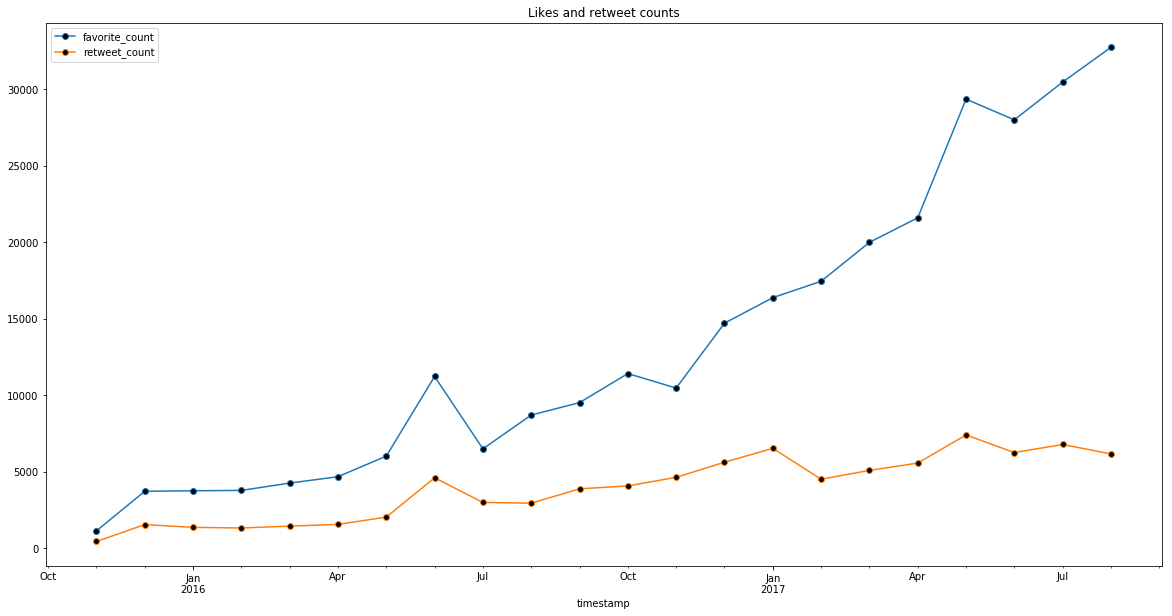

In [12]:
dftime1.plot(linestyle='-', markevery=1, marker='o', markerfacecolor='black',title='Likes and retweet counts', figsize=(20,10))
plt.show()

*Based on result can be said `retweet_count` has increase very smoothly and eve reach to steady situation, but `favorite_count` after Nov.2016 increase sharply and continue this trend. One reason maybe is active social media followers who has active twitter accounts and prefer to share interesting tweet with their followers, reached to relatively stable numbers. So, the rest of followers are less professional users of twitters and just make favorite for tweets they likes.*

*What time during a day, tweets more have been seen by followers based on more retweet and favorite counts?*

In [245]:
# first groupby favorite_count and retweet_count by 24 hours a day
dftime2 = df.groupby(df.set_index('timestamp').index.hour)["favorite_count", "retweet_count"].mean()
dftime2

,favorite_count,retweet_count
timestamp,,
0,13857.630631,3964.828829
1,8175.231405,2860.665289
2,4599.882022,2316.219101
3,4027.514925,1706.880597
4,3305.561644,1133.287671
5,3859.055556,1648.277778
6,44835.333333,21222.333333
13,357.000000,5273.500000
14,6751.750000,1797.250000


In [246]:
# bining 24 hours in four categories
dftime2.groupby(pd.cut(dftime2.index, [0,5,13,18,24])).sum()

,favorite_count,retweet_count
"(0, 5]",23967.245552,9665.330436
"(5, 13]",45192.333333,26495.833333
"(13, 18]",52168.075494,15568.862150
"(18, 24]",38673.721396,13399.802184


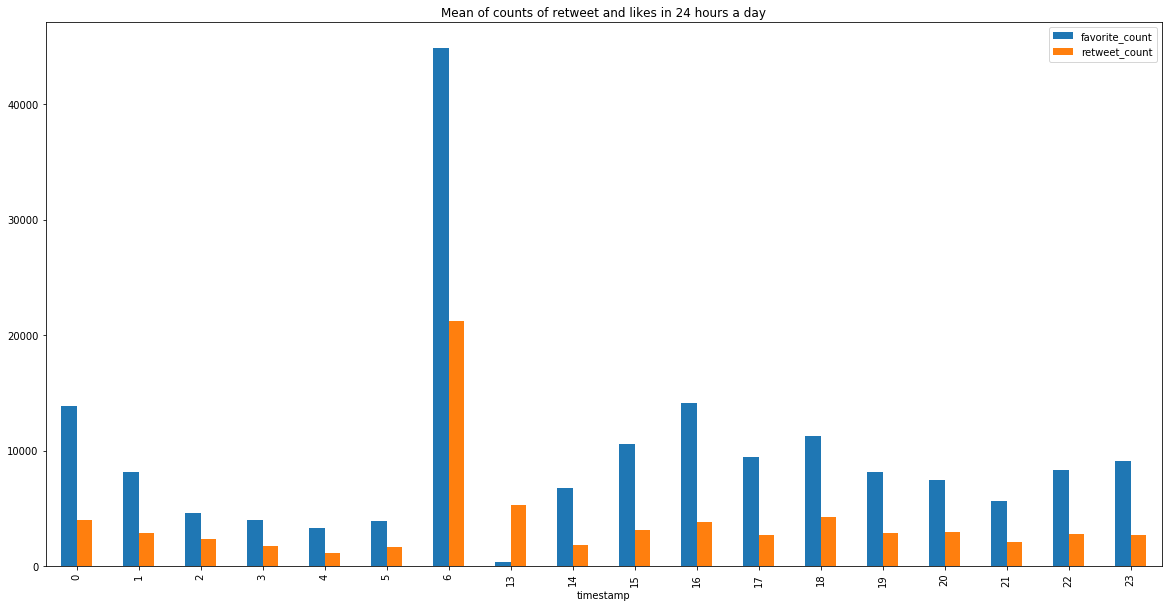

In [247]:
dftime2.plot.bar(title='Mean of counts of retweet and likes in 24 hours a day',figsize=(20,10));

*The results shows during time from 6 a.m. to 1 p.m. tweets get most retweet and favorite counts that can be inference this period of time in a day follower pay most attention to tweets of this account.*

*Which `stage` was more attractive for follower based on `retweet_count` and `favorite_count`?*

In [248]:
dfstage1 = df.groupby('stage')["favorite_count", "retweet_count"].mean()
dfstage1

,favorite_count,retweet_count
stage,,
doggo,19368.456140,7695.052632
floofer,12716.571429,4703.571429
multi,16017.000000,7386.400000
pupper,7236.041420,2466.035503
puppo,20807.909091,6177.409091


In [249]:
dfstage2 = df.groupby(['stage', pd.Grouper(key='timestamp', freq='A')])["favorite_count", "retweet_count"].mean()
dfstage2

favorite_count  retweet_count
stage   timestamp                                
doggo   2016-12-31  19054.785714    8250.142857  
        2017-12-31  19671.310345    7159.103448  
floofer 2016-12-31  11112.666667    4880.833333  
        2017-12-31  22340.000000    3640.000000  
multi   2016-12-31  12271.571429    7048.000000  
        2017-12-31  24756.333333    8176.000000  
pupper  2015-12-31  3614.440000     1422.640000  
        2016-12-31  5172.010309     1848.474227  
        2017-12-31  24567.454545    7560.272727  
puppo   2016-12-31  8978.545455     2800.545455  
        2017-12-31  32637.272727    9554.272727

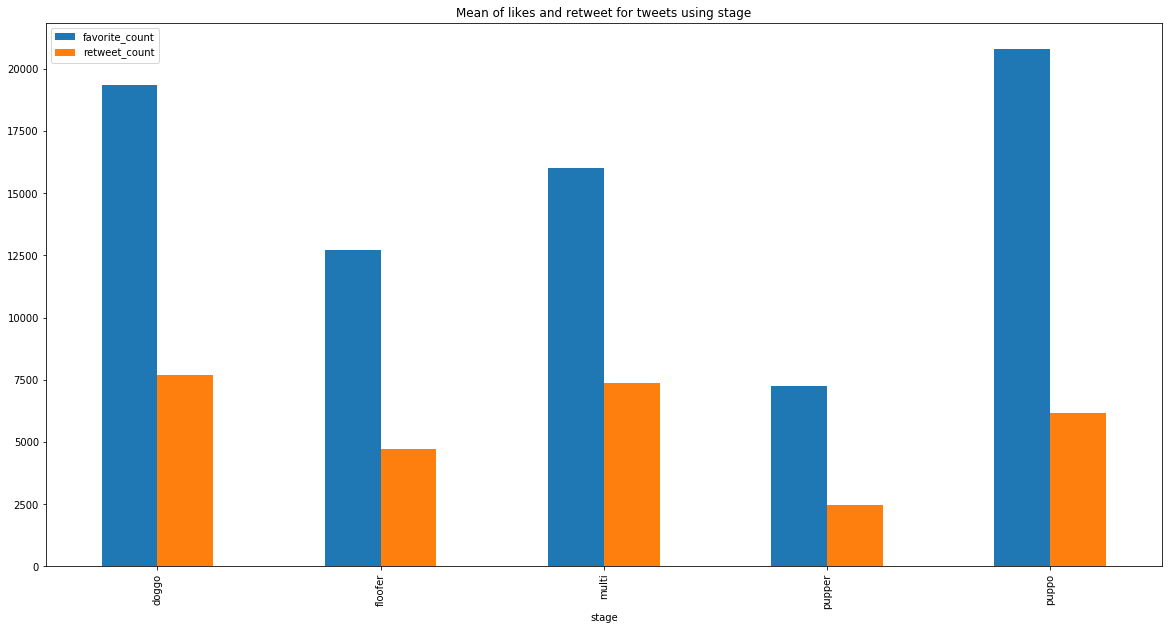

In [250]:
dfstage1.plot.bar(title='Mean of likes and retweet for tweets using stage',figsize=(20,10));

*As results and graph show, `puppo` was the most attractive stage for follower based on retweet and favorite counts.*

*Which breed get more retweet and favorite?*

In [251]:
df.groupby('breed')["favorite_count", "retweet_count"].mean().idxmax()

favorite_count    Bedlington Terrier
retweet_count     Afghan Hound      
dtype: object

*Does image prediction algorithm, work out with more confident with more image?*

In [252]:
df.groupby('img_num')['p_conf'].mean()

img_num
1    0.534850
2    0.628762
3    0.642915
4    0.787975
Name: p_conf, dtype: float64

*The result shows, mean of probability confident is max as 4 image then 3, 2 and 1. So, algorithm result with more image gets more accure.*

*Do those tweets with higher `rating_denominator` get more `favorite_count` and `retweet_count` than other with standard `rating_denominator` (10)?*

In [253]:
high_denominator = df.query('rating_denominator>10')
standard_denominator = df.query('rating_denominator == 10') 

In [254]:
high_denominator.agg({'retweet_count': ['max','min' ,'mean'], 'favorite_count': ['max','min', 'mean']})

,retweet_count,favorite_count
max,3531.000000,13012.000000
min,227.000000,2422.000000
mean,1325.818182,4106.636364


In [255]:
standard_denominator.agg({'retweet_count': ['max','min' ,'mean'], 'favorite_count': ['max','min', 'mean']})

,retweet_count,favorite_count
max,83951.000000,164766.000000
min,12.000000,0.000000
mean,2927.546968,8928.310345


*The result shows tweets with standard `rating_denominator` were been more retweeted and got more favorite.*

In [256]:
print(max(df.timestamp))
print(min(df.timestamp))

2017-08-01 00:17:27
2015-11-15 22:32:08
